In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([73825 , 58825  , 55825 , 51025 , 52625 , 58625 , 51625 , 46425 , 47025, 44225,  42025 , 41625, 34425 , 36625 , 38225, 41425, 40825, 43425, 47425, 54225, 50625, 56825, 59625, 54225, 49825, 45025, 37425, 34225, 34625, 33825, 32425, 30425, 26425, 22025, 24625, 24825, 26425, 29625, 26625, 33625, 33225, 41625, 46825, 47025, 55225, 59625, 64425, 67225, 69425, 66025, 66025, 60425, 57025, 54625, 53825, 48625, 42825, 42825, 42025, 36825, 29425, 29025, 29425, 31625, 34025, 30000, 26225, 14825, 13025, 14825, 18025, 18425, 18025, 17425, 13825, 8625 , 12225, 7225 , 10025, 5825 , 11625, 9025, 5625  , 4625, 4425  , 3825])
y = np.array([284125,246125, 134125, 160125, 316125, 482125, 446125, 228125, 162125, 56125, 180125, 238125, 98125, 184125, 274125,374125,454125,490125,502125,554125,566125,608125,658125,654125,626125,574125,496125,442125,378125,318125,264125,186125,132125,132125,176125,212125,262125,344125,442125,532125,580125,658125,678125,714125,722125,714125,710125,728125,786125,806125,846125,840125,772125,812125,842125,850125,864125,786125,752125,840125,840125,742125,716125,676125,642125,600000,588125,142125,168125,222125,330125,396125,482125,568125,330125,336125,414125,412125,480125,496125,540125,556125,558125,694125,734125,802125])
anotasi = ["J","A","B","D","E","F","H","K","L","M","N","O","P","Q","R","S","T","U","V","W","Z","A_1","B_1","C_1","D_1","E_1","F_1","G_1","H_1","I_1","J_1","K_1","L_1","M_1","N_1","O_1","P_1","Q_1","R_1","S_1","T_1","U_1","V_1","W_1","Z_1","A_2","B_2","C_2","D_2","E_2","F_2","G_2","H_2","I_2","J_2","K_2","L_2","M_2","N_2","O_2","P_2","Q_2","R_2","S_2","T_2","U_2","V_2","W_2","Z_2","A_3","B_3","C_3","D_3","E_3","F_3","G_3","H_3","I_3","J_3","K_3","L_3","M_3","N_3","O_3","P_3","Q_3"]

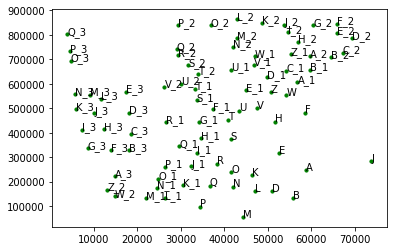

In [3]:

for i, label in enumerate(anotasi):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y, s=10, color='green')
plt.show()

In [4]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 100

# maximum generation
N = 2

In [5]:
# distance matrix
d = np.zeros((m, m), dtype=int)

for i in range(m):
    for j in range(m):
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[     0,  40853, 151076, ..., 415798, 455320, 522708],
       [ 40853,      0, 112040, ..., 451266, 491022, 558713],
       [151076, 112040,      0, ..., 562335, 602197, 670020],
       ...,
       [415798, 451266, 562335, ...,      0,  40000, 108002],
       [455320, 491022, 602197, ...,  40000,      0,  68002],
       [522708, 558713, 670020, ..., 108002,  68002,      0]])

In [6]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)
    
    for i in range(n):
        pop[i] = np.random.permutation(m)
    
    pop = pd.DataFrame(pop)
    
    return pop

In [7]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)
    
    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b
    
    pop['fitness'] = fitness
    
    return pop

In [8]:
def crossover(pop):
    popc = pop.copy()
    for o in range(n):
        kposition = np.random.permutation(n)
        acakkrom1 = kposition[0]
        acakkrom2 = kposition[1] 
        
        gposition = np.random.permutation(m)
        acakgen1 = gposition[0]
        acakgen2 = gposition[1]
        acakgen3 = gposition[2]

        isiindex1 = popc.at[acakkrom1,acakgen1] #memilih 1 jenis kromoson, dipilih acak genya, dijadikan sample untuk persilangan
        isiindex2 = popc.at[acakkrom1,acakgen2]
        isiindex3 = popc.at[acakkrom1,acakgen3]

        parent1 = popc.loc[acakkrom1]
        parent2 = popc.loc[acakkrom2]
        childP1 = [isiindex1,isiindex2,isiindex3] #seharusnya ini menunjukkan hasil dari index, bukan indexnya

        for i in range(n,m): #kromoson/baris(n), gen/column(m)
            childP1.append(parent1[i])

        childP2 = [item for item in parent2 if item not in childP1]

        res = []
        for i in childP1:
            if i not in res:
                res.append(i)

        child = res + childP2
        popc.loc[o] = child

    
    return popc

In [9]:
def mutation(pop):
    popm = pop.copy()
    
    for i in range(n):
        position = np.random.permutation(m)
        a = position[0]
        b = position[1]
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [10]:
def combinePopulation(pop, popm, popc):
    popAll = pop.copy()
    popAll = popAll.append(popm)
    popAll = popAll.append(popc)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [11]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [12]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [25]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = a[0]
    b[m] = b[0]

    for i, label in enumerate(anotasi):
      plt.annotate(label, (a[i], b[i]))
    
    plt.plot(a, b, color='green', marker = 'o')
    plt.show()

Solusi pada populasi awal
    0   1   2   3   4   5   6   7   8   9  ...  77  78  79  80  81  82  83  \
0  19  38  15  16  34  58  30  71  68  49  ...   4  26  84  77  53  32  56   

   84  85   fitness  
0  27  67  25640239  

[1 rows x 87 columns]


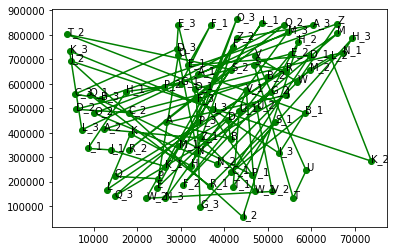


Solusi terbaik pada populasi generasi ke-1
    0   1   2   3   4   5   6   7   8   9  ...  77  78  79  80  81  82  83  \
0  12  73  45  25  66  84  43  26  42  64  ...  41  62  83  44  46  30  23   

   84  85   fitness  
0  68  24  19410019  

[1 rows x 87 columns]


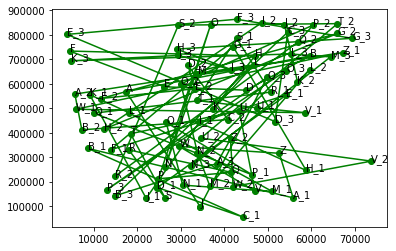


Solusi terbaik pada populasi generasi ke-2
    0   1   2   3   4   5   6   7   8   9  ...  77  78  79  80  81  82  83  \
0  21  19  27  61  80  42  47  54  45  24  ...  10  50  59   8  40  62  64   

   84  85   fitness  
0  55  48  19352347  

[1 rows x 87 columns]


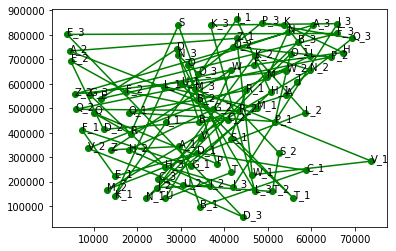


Solusi terbaik pada populasi akhir
    0   1   2   3   4   5   6   7   8   9  ...  77  78  79  80  81  82  83  \
0  21  19  27  61  80  42  47  54  45  24  ...  10  50  59   8  40  62  64   

   84  85   fitness  
0  55  48  19352347  

[1 rows x 87 columns]


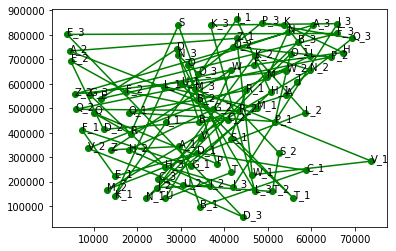

In [22]:
pop = createPopulation()
pop = fitness(pop)
print('Solusi pada populasi awal')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(pop)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popm, popc)

    popAll = sort(popAll)

    pop = elimination(popAll)
    
    print()
    print('Solusi terbaik pada populasi generasi ke-'+ str(i))
    print(pop.head(1))
    plotSolution(pop)

print()
print('Solusi terbaik pada populasi akhir')
print(pop.head(1))
plotSolution(pop)